In [1]:
%matplotlib inline

In [2]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolplanck')

from halotools.empirical_models import PrebuiltSubhaloModelFactory
model = PrebuiltSubhaloModelFactory('behroozi10')

model.populate_mock(halocat)

from galsampler import halo_bin_indices

logsm_low, logmhost_low = 10, 11
mhost_bins = np.logspace(logmhost_low, 15.5, 25)

galaxy_mask = model.mock.galaxy_table['stellar_mass'] > 10**logsm_low
galaxy_mask *= model.mock.galaxy_table['halo_mvir_host_halo'] > 10**logmhost_low
source_galaxies = model.mock.galaxy_table[galaxy_mask]

host_halo_mask = halocat.halo_table['halo_upid'] == -1
host_halo_mask *= halocat.halo_table['halo_mvir_host_halo'] > 10**logmhost_low
source_halos = halocat.halo_table[host_halo_mask]

target_halocat = CachedHaloCatalog(simname='multidark')
target_host_halo_mask = target_halocat.halo_table['halo_upid'] == -1
target_host_halo_mask *= target_halocat.halo_table['halo_mvir_host_halo'] > 10**logmhost_low
target_halos = target_halocat.halo_table[target_host_halo_mask]


source_halos['bin_number'] = halo_bin_indices(mass=(source_halos['halo_mvir_host_halo'], mhost_bins))
target_halos['bin_number'] = halo_bin_indices(mass=(target_halos['halo_mvir_host_halo'], mhost_bins))

In [5]:
from galsampler.end_to_end import source_galaxy_selection_indices

source_galaxies_colnames=dict(host_halo_id='halo_hostid')
nhalo_min = 50
indices = source_galaxy_selection_indices(source_galaxies, source_halos, 
                    target_halos, nhalo_min, mhost_bins, 
                    source_galaxies_colnames=source_galaxies_colnames)

target_galaxies = source_galaxies[indices]

Vbox_source = np.prod(halocat.Lbox)
Vbox_target = np.prod(target_halocat.Lbox)

nd_source = len(source_galaxies)/Vbox_source
nd_target = len(target_galaxies)/Vbox_target

print("Source galaxy number density = {0:.4f}".format(nd_source))
print("Target galaxy number density = {0:.4f}".format(nd_target))

Source galaxy number density = 0.0121
Target galaxy number density = 0.0182


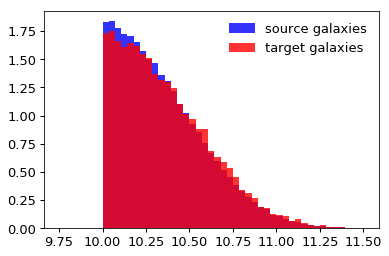

In [6]:
fig, ax = plt.subplots(1, 1)

sm_bins = np.linspace(9.75, 11.5, 50)
__=ax.hist(np.log10(source_galaxies['stellar_mass']), normed=True, bins=sm_bins, 
          alpha=0.8, color='blue', label='source galaxies')
__=ax.hist(np.log10(target_galaxies['stellar_mass']), normed=True, bins=sm_bins, 
          alpha=0.8, color='red', label='target galaxies')

legend = ax.legend()

## Prepare unit-testing catalog